# Convolutional NN

In [1]:
import os
os.chdir('C:\\Users\\MJ Couto\\Desktop\\sib_git\\si\\src')

In [2]:
import numpy as np
import gzip
import os
import pickle
from matplotlib import pyplot


from si.data import Dataset
from si.util.util import to_categorical

Load the MNIST dataset

In [3]:
def load_mnist(sample_size=None):
    DIR = os.path.dirname(os.path.realpath('.'))
    filename = os.path.join(DIR, 'datasets/mnist.pkl.gz')
    f = gzip.open(filename, 'rb')
    data = pickle.load(f, encoding='bytes')
    (x_train, y_train), (x_test, y_test) = data
    if sample_size:
        return Dataset(x_train[:sample_size],y_train[:sample_size]),Dataset(x_test,y_test)
    else:
        return Dataset(x_train,y_train),Dataset(x_test,y_test)

In [4]:
train,test = load_mnist(500)

In [5]:
def preprocess(train):
    # reshape and normalize input data 
    train.X = train.X.reshape(train.X.shape[0], 28, 28, 1)
    train.X = train.X.astype('float32')
    train.X /= 255
    train.Y = to_categorical(train.Y)

In [6]:
preprocess(train)
preprocess(test)

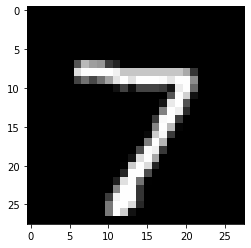

In [7]:
def plot_img(img,shape=(28,28)):
    pic = (img*255).reshape(shape)
    pic = pic.astype('int')
    pyplot.imshow(pic, cmap=pyplot.get_cmap('gray'))
    pyplot.show()

plot_img(test.X[0])

In [8]:
from si.supervised.nn import NN, Dense, Activation, Conv2D, Flatten, MaxPooling2D
from si.util.activation import Tanh, Sigmoid 
from si.util.metrics import cross_entropy, cross_entropy_prime

### Check Conv2D

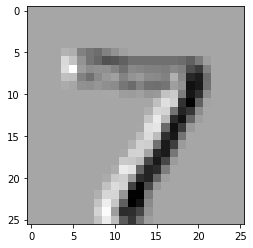

In [9]:
conv = Conv2D((28, 28,1), (3, 3), 1)
out = conv.forward(test.X[:1])
plot_img(out, shape=(26, 26))


### Check MaxPooling

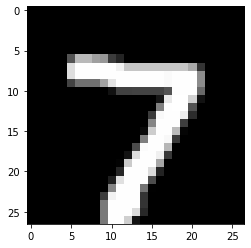

In [10]:
pool = MaxPooling2D(size=2,stride=1)
out = pool.forward(test.X[:1])
plot_img(out, shape=(27, 27))


## Build the model

In [11]:
net = NN(epochs=2000,lr=0.1,verbose=False)
net.add(Conv2D((28, 28,1), (3, 3), 1))  
net.add(Activation(Tanh()))
net.add(MaxPooling2D())
net.add(Flatten())
net.add(Dense(25*25*1, 100))           
net.add(Activation(Tanh()))
net.add(Dense(100, 10))                
net.add(Activation(Sigmoid()))

net.useLoss(cross_entropy, cross_entropy_prime)

## Train the model

In [12]:
net.fit(train)

 epoch 1/2000 error = 533.7731848143837
 epoch 2/2000 error = 11571.292166524927
 epoch 3/2000 error = 11571.2350761295
 epoch 4/2000 error = 11571.177874304041
 epoch 5/2000 error = 11571.120560360334
 epoch 6/2000 error = 11571.063133605541
 epoch 7/2000 error = 11571.005593342157
 epoch 8/2000 error = 11570.94793886799
 epoch 9/2000 error = 11570.890169476108
 epoch 10/2000 error = 11570.832284454815
 epoch 11/2000 error = 11570.774283087616
 epoch 12/2000 error = 11570.716164653171
 epoch 13/2000 error = 11570.657928425284
 epoch 14/2000 error = 11570.599573672836
 epoch 15/2000 error = 11570.541099659771
 epoch 16/2000 error = 11570.482505645037
 epoch 17/2000 error = 11570.423790882576
 epoch 18/2000 error = 11570.364954621275
 epoch 19/2000 error = 11570.30599610493
 epoch 20/2000 error = 11570.246914572184
 epoch 21/2000 error = 11570.187709256536
 epoch 22/2000 error = 11570.128379386262
 epoch 23/2000 error = 11570.068924184397
 epoch 24/2000 error = 11570.009342868692
 epoch

 epoch 195/2000 error = 11557.041350525698
 epoch 196/2000 error = 11556.941810511395
 epoch 197/2000 error = 11556.841876793194
 epoch 198/2000 error = 11556.741546603345
 epoch 199/2000 error = 11556.640817152338
 epoch 200/2000 error = 11556.539685628737
 epoch 201/2000 error = 11556.43814919897
 epoch 202/2000 error = 11556.336205007141
 epoch 203/2000 error = 11556.233850174845
 epoch 204/2000 error = 11556.131081800952
 epoch 205/2000 error = 11556.027896961426
 epoch 206/2000 error = 11555.9242927091
 epoch 207/2000 error = 11555.820266073484
 epoch 208/2000 error = 11555.715814060579
 epoch 209/2000 error = 11555.610933652639
 epoch 210/2000 error = 11555.505621807966
 epoch 211/2000 error = 11555.399875460716
 epoch 212/2000 error = 11555.293691520674
 epoch 213/2000 error = 11555.187066873046
 epoch 214/2000 error = 11555.07999837822
 epoch 215/2000 error = 11554.97248287158
 epoch 216/2000 error = 11554.86451716326
 epoch 217/2000 error = 11554.756098037913
 epoch 218/2000 e

 epoch 387/2000 error = 11525.765415922613
 epoch 388/2000 error = 11525.499075021913
 epoch 389/2000 error = 11525.231060520277
 epoch 390/2000 error = 11524.961359309369
 epoch 391/2000 error = 11524.689958188257
 epoch 392/2000 error = 11524.416843863348
 epoch 393/2000 error = 11524.142002948418
 epoch 394/2000 error = 11523.865421964594
 epoch 395/2000 error = 11523.58708734045
 epoch 396/2000 error = 11523.306985412051
 epoch 397/2000 error = 11523.0251024231
 epoch 398/2000 error = 11522.741424525033
 epoch 399/2000 error = 11522.455937777224
 epoch 400/2000 error = 11522.168628147198
 epoch 401/2000 error = 11521.879481510852
 epoch 402/2000 error = 11521.588483652758
 epoch 403/2000 error = 11521.29562026646
 epoch 404/2000 error = 11521.000876954848
 epoch 405/2000 error = 11520.704239230537
 epoch 406/2000 error = 11520.405692516337
 epoch 407/2000 error = 11520.105222145694
 epoch 408/2000 error = 11519.802813363242
 epoch 409/2000 error = 11519.49845132538
 epoch 410/2000 

 epoch 579/2000 error = 11428.412940360718
 epoch 580/2000 error = 11427.650900292432
 epoch 581/2000 error = 11426.888144517161
 epoch 582/2000 error = 11426.124754222648
 epoch 583/2000 error = 11425.360811456045
 epoch 584/2000 error = 11424.596399079875
 epoch 585/2000 error = 11423.83160072621
 epoch 586/2000 error = 11423.066500749213
 epoch 587/2000 error = 11422.301184176013
 epoch 588/2000 error = 11421.535736655944
 epoch 589/2000 error = 11420.770244408239
 epoch 590/2000 error = 11420.004794168177
 epoch 591/2000 error = 11419.239473131762
 epoch 592/2000 error = 11418.474368898993
 epoch 593/2000 error = 11417.709569415752
 epoch 594/2000 error = 11416.94516291445
 epoch 595/2000 error = 11416.181237853352
 epoch 596/2000 error = 11415.417882854867
 epoch 597/2000 error = 11414.65518664265
 epoch 598/2000 error = 11413.893237977776
 epoch 599/2000 error = 11413.13212559395
 epoch 600/2000 error = 11412.37193813192
 epoch 601/2000 error = 11411.612764073101
 epoch 602/2000 

 epoch 771/2000 error = 11311.68966139192
 epoch 772/2000 error = 11310.86342412106
 epoch 773/2000 error = 11310.020300882345
 epoch 774/2000 error = 11309.15963918429
 epoch 775/2000 error = 11308.280758254252
 epoch 776/2000 error = 11307.382947337437
 epoch 777/2000 error = 11306.465463871951
 epoch 778/2000 error = 11305.527531529111
 epoch 779/2000 error = 11304.56833810726
 epoch 780/2000 error = 11303.587033265989
 epoch 781/2000 error = 11302.582726086475
 epoch 782/2000 error = 11301.554482441994
 epoch 783/2000 error = 11300.501322161046
 epoch 784/2000 error = 11299.422215963597
 epoch 785/2000 error = 11298.316082148858
 epoch 786/2000 error = 11297.181783010516
 epoch 787/2000 error = 11296.01812095275
 epoch 788/2000 error = 11294.823834277166
 epoch 789/2000 error = 11293.597592607464
 epoch 790/2000 error = 11292.337991914499
 epoch 791/2000 error = 11291.04354910026
 epoch 792/2000 error = 11289.71269609389
 epoch 793/2000 error = 11288.343773407181
 epoch 794/2000 er

 epoch 963/2000 error = 24125.23196864233
 epoch 964/2000 error = 24125.23104683335
 epoch 965/2000 error = 24125.230125033548
 epoch 966/2000 error = 24125.22920324292
 epoch 967/2000 error = 24125.22828146147
 epoch 968/2000 error = 24125.22735968921
 epoch 969/2000 error = 24125.22643792611
 epoch 970/2000 error = 24125.2255161722
 epoch 971/2000 error = 24125.22459442746
 epoch 972/2000 error = 24125.2236726919
 epoch 973/2000 error = 24125.222750965506
 epoch 974/2000 error = 24125.2218292483
 epoch 975/2000 error = 24125.220907540268
 epoch 976/2000 error = 24125.219985841413
 epoch 977/2000 error = 24125.21906415173
 epoch 978/2000 error = 24125.21814247123
 epoch 979/2000 error = 24125.217220799896
 epoch 980/2000 error = 24125.216299137748
 epoch 981/2000 error = 24125.215377484776
 epoch 982/2000 error = 24125.214455840975
 epoch 983/2000 error = 24125.213534206345
 epoch 984/2000 error = 24125.212612580894
 epoch 985/2000 error = 24125.211690964614
 epoch 986/2000 error = 24

 epoch 1152/2000 error = 24125.057909651878
 epoch 1153/2000 error = 24125.056989575172
 epoch 1154/2000 error = 24125.056069507613
 epoch 1155/2000 error = 24125.055149449214
 epoch 1156/2000 error = 24125.054229399968
 epoch 1157/2000 error = 24125.05330935987
 epoch 1158/2000 error = 24125.052389328932
 epoch 1159/2000 error = 24125.051469307138
 epoch 1160/2000 error = 24125.0505492945
 epoch 1161/2000 error = 24125.049629291017
 epoch 1162/2000 error = 24125.048709296687
 epoch 1163/2000 error = 24125.047789311506
 epoch 1164/2000 error = 24125.046869335474
 epoch 1165/2000 error = 24125.0459493686
 epoch 1166/2000 error = 24125.045029410878
 epoch 1167/2000 error = 24125.044109462306
 epoch 1168/2000 error = 24125.043189522876
 epoch 1169/2000 error = 24125.042269592606
 epoch 1170/2000 error = 24125.04134967149
 epoch 1171/2000 error = 24125.04042975952
 epoch 1172/2000 error = 24125.039509856702
 epoch 1173/2000 error = 24125.038589963035
 epoch 1174/2000 error = 24125.03767007

 epoch 1340/2000 error = 24124.88509598383
 epoch 1341/2000 error = 24124.88417762564
 epoch 1342/2000 error = 24124.883259276576
 epoch 1343/2000 error = 24124.882340936638
 epoch 1344/2000 error = 24124.88142260583
 epoch 1345/2000 error = 24124.880504284156
 epoch 1346/2000 error = 24124.879585971605
 epoch 1347/2000 error = 24124.878667668178
 epoch 1348/2000 error = 24124.877749373885
 epoch 1349/2000 error = 24124.876831088714
 epoch 1350/2000 error = 24124.87591281268
 epoch 1351/2000 error = 24124.87499454577
 epoch 1352/2000 error = 24124.874076287982
 epoch 1353/2000 error = 24124.87315803933
 epoch 1354/2000 error = 24124.8722397998
 epoch 1355/2000 error = 24124.8713215694
 epoch 1356/2000 error = 24124.870403348126
 epoch 1357/2000 error = 24124.869485135972
 epoch 1358/2000 error = 24124.868566932953
 epoch 1359/2000 error = 24124.867648739055
 epoch 1360/2000 error = 24124.86673055429
 epoch 1361/2000 error = 24124.865812378648
 epoch 1362/2000 error = 24124.864894212133

 epoch 1528/2000 error = 24124.71260496798
 epoch 1529/2000 error = 24124.71168832372
 epoch 1530/2000 error = 24124.710771688566
 epoch 1531/2000 error = 24124.70985506251
 epoch 1532/2000 error = 24124.708938445565
 epoch 1533/2000 error = 24124.708021837727
 epoch 1534/2000 error = 24124.707105238987
 epoch 1535/2000 error = 24124.706188649354
 epoch 1536/2000 error = 24124.70527206882
 epoch 1537/2000 error = 24124.704355497393
 epoch 1538/2000 error = 24124.703438935067
 epoch 1539/2000 error = 24124.702522381845
 epoch 1540/2000 error = 24124.70160583773
 epoch 1541/2000 error = 24124.700689302714
 epoch 1542/2000 error = 24124.699772776803
 epoch 1543/2000 error = 24124.69885625999
 epoch 1544/2000 error = 24124.697939752285
 epoch 1545/2000 error = 24124.69702325368
 epoch 1546/2000 error = 24124.696106764175
 epoch 1547/2000 error = 24124.69519028378
 epoch 1548/2000 error = 24124.694273812485
 epoch 1549/2000 error = 24124.69335735029
 epoch 1550/2000 error = 24124.6924408971

 epoch 1716/2000 error = 24124.540435744042
 epoch 1717/2000 error = 24124.539520809143
 epoch 1718/2000 error = 24124.538605883325
 epoch 1719/2000 error = 24124.537690966587
 epoch 1720/2000 error = 24124.536776058925
 epoch 1721/2000 error = 24124.53586116035
 epoch 1722/2000 error = 24124.534946270855
 epoch 1723/2000 error = 24124.534031390434
 epoch 1724/2000 error = 24124.533116519087
 epoch 1725/2000 error = 24124.532201656828
 epoch 1726/2000 error = 24124.53128680365
 epoch 1727/2000 error = 24124.530371959547
 epoch 1728/2000 error = 24124.529457124518
 epoch 1729/2000 error = 24124.528542298573
 epoch 1730/2000 error = 24124.527627481708
 epoch 1731/2000 error = 24124.526712673924
 epoch 1732/2000 error = 24124.525797875212
 epoch 1733/2000 error = 24124.524883085578
 epoch 1734/2000 error = 24124.523968305024
 epoch 1735/2000 error = 24124.52305353355
 epoch 1736/2000 error = 24124.522138771154
 epoch 1737/2000 error = 24124.521224017833
 epoch 1738/2000 error = 24124.5203

 epoch 1904/2000 error = 24124.36858745282
 epoch 1905/2000 error = 24124.367674222718
 epoch 1906/2000 error = 24124.36676100167
 epoch 1907/2000 error = 24124.36584778967
 epoch 1908/2000 error = 24124.364934586734
 epoch 1909/2000 error = 24124.364021392852
 epoch 1910/2000 error = 24124.363108208025
 epoch 1911/2000 error = 24124.36219503226
 epoch 1912/2000 error = 24124.36128186554
 epoch 1913/2000 error = 24124.360368707876
 epoch 1914/2000 error = 24124.359455559268
 epoch 1915/2000 error = 24124.358542419715
 epoch 1916/2000 error = 24124.357629289218
 epoch 1917/2000 error = 24124.35671616778
 epoch 1918/2000 error = 24124.355803055383
 epoch 1919/2000 error = 24124.35488995205
 epoch 1920/2000 error = 24124.353976857772
 epoch 1921/2000 error = 24124.35306377254
 epoch 1922/2000 error = 24124.352150696366
 epoch 1923/2000 error = 24124.35123762925
 epoch 1924/2000 error = 24124.350324571176
 epoch 1925/2000 error = 24124.34941152217
 epoch 1926/2000 error = 24124.34849848221

In [13]:
out = net.predict(test.X[0:3])
print("\n")
print("predicted values : ")
print(np.round(out), end="\n")
print("true values : ")
print(test.Y[0:3])



predicted values : 
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
true values : 
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [14]:
conv1 = net.layers[0]
act1 = net.layers[1]
pool1 = net.layers[2]

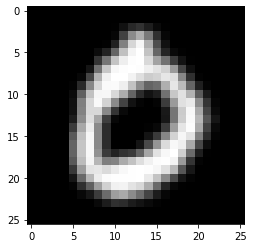

In [24]:
img1 = conv1.forward(test.X[3:4])
plot_img(img1,shape=(26,26))


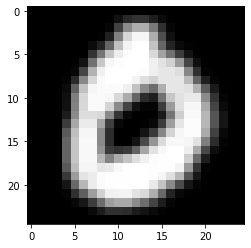

In [27]:
img2= pool1.forward(img1)
plot_img(img2,shape=(25,25))

In [19]:
a = np.arange(1,10).reshape(3,3)
a


array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [20]:
d = a.reshape(1,3,3,1)
d

array([[[[1],
         [2],
         [3]],

        [[4],
         [5],
         [6]],

        [[7],
         [8],
         [9]]]])

In [21]:
pool_1 = MaxPooling2D(size=2,stride=1)
out = pool_1.forward(d)
out

array([[[[5],
         [6]],

        [[8],
         [9]]]])